Characterization of the GPR sampler for learning a landscape. Error seems to decay exponentially in simple landscapes.

In [1]:
%pylab inline
plt.rc('font',size=20)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel

# Radial coordinate system GPR.

In [ ]:
from perceptionneuron.coherence import GPR
noise_scale = 1e-1
gpr = GPR(alpha=noise_scale,length_scale=array([2,.2]))

# Define sigmoid function.
random.RandomState(0)

# Tanh function [-1,1] expanded to .
def fun_z(theta,invr):
    return ((1-invr)*cos(-theta)+(1-invr)*sin(-theta))-.5

xy0 = np.array([[random.rand()*2,random.rand()]])
z = fun_z(xy0[0,0],xy0[0,1])+random.normal(scale=noise_scale)
obj = reshape([fun_z(i,j) for i,j in gpr.meshPoints],(10,16))

gpr.update(z,*xy0[0])

In [990]:
# Pick next point where uncertainty is maximized.
newt,newf = gpr.max_uncertainty()

totalErr = [norm(gpr.coherence_pred-obj.ravel())]
totalVar = [(gpr.std_pred**2).sum()]
maxVar = [gpr.std_pred.max()**2]

counter = 0
# while linalg.norm(gpr.coherence_pred-obj.ravel()).max()>1:
while counter<50 and norm(gpr.coherence_pred-obj.ravel()).max()>1:
    gpr.update( fun_z(newt,newf)+random.normal(scale=noise_scale),newt,newf )
    newt,newf = gpr.max_uncertainty()
    
    totalErr.append( linalg.norm(gpr.coherence_pred-obj.ravel()) )
    totalVar.append((gpr.std_pred**2).sum())
    maxVar.append(gpr.std_pred.max()**2)
    counter += 1
totalVar = array(totalVar)

[[], <matplotlib.text.Text at 0x7fd687f0bd90>]

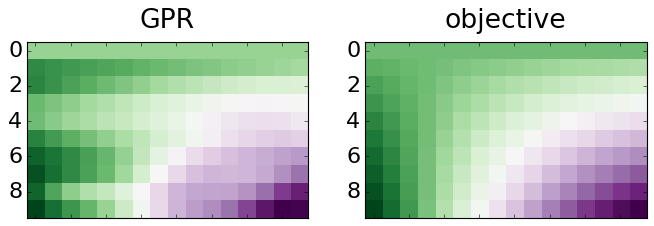

In [994]:
fig,ax = plt.subplots(figsize=(10,4),ncols=2)
ax[0].matshow(gpr.coherence_pred.reshape(10,16)[::-1],cmap=plt.cm.PRGn)
ax[1].matshow(obj[::-1],cmap=plt.cm.PRGn)
ax[0].set(title='GPR',xticklabels=[])
ax[1].set(title='objective',xticklabels=[])

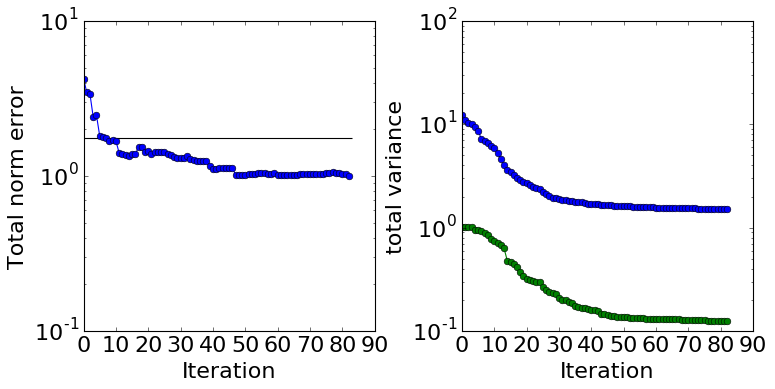

In [982]:
# Error decrease quickly at first, but there is a large regime where data collection does not help very much in learning the landscape. Not sure why exponential regime does not continue. Have we hit noise?
fig,ax = plt.subplots(figsize=(10.8,5),ncols=2)
x = arange(len(totalErr))

ax[0].semilogy(totalErr,'o-')
ax[0].hlines(noise_scale*160/sqrt(counter),0,len(totalErr))
ax[1].semilogy(sqrt(totalVar),'o-')
ax[1].semilogy(sqrt(maxVar),'o-')

ax[0].set(xlabel='Iteration',ylabel='Total norm error')
ax[1].set(xlabel='Iteration',ylabel='total variance')

fig.subplots_adjust(wspace=.3)

## Test selecting points closest to the contour.

In [1121]:
from perceptionneuron.coherence import GPR
noise_scale = 1e-1
gpr = GPR(alpha=noise_scale,length_scale=array([2,.2]))

# Define sigmoid function.
random.RandomState(0)

# Tanh function [-1,1] expanded to .
def fun_z(theta,invr):
    return ((1-invr)*cos(-theta)+(1-invr)*sin(-theta))-.5

xy0 = np.array([[random.rand()*2,random.rand()]])
z = fun_z(xy0[0,0],xy0[0,1])+random.normal(scale=noise_scale)
obj = reshape([fun_z(i,j) for i,j in gpr.meshPoints],(10,16))

gpr.update(z,*xy0[0])

# Pick next point where uncertainty is maximized.
newt,newf = gpr.max_uncertainty()

counter = 0
while counter<15:
    gpr.update( fun_z(newt,newf)+random.normal(scale=noise_scale),newt,newf )
    newt,newf = gpr.max_uncertainty()
    counter += 1

In [1137]:
# Pick next point along contour given by performance value.
newt,newf = gpr.select_contour(.3,avoid_points=True)
gpr.update( fun_z(newt,newf)+random.normal(scale=noise_scale),newt,newf )
gpr.pointsToAvoid.append(concatenate([newt,newf]))
print newt,newf

[ 1.3] [ 0.3]


[[], <matplotlib.text.Text at 0x7fd684446090>]

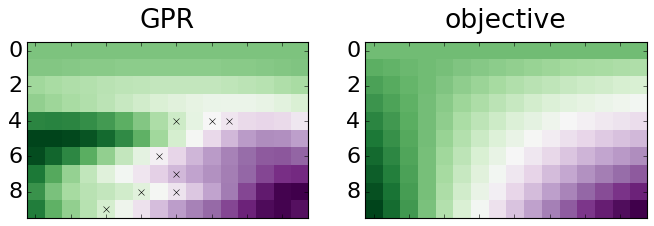

In [1143]:
fig,ax = plt.subplots(figsize=(10,4),ncols=2)
mx = abs(gpr.coherence_pred).max()
ax[0].matshow(gpr.coherence_pred.reshape(10,16)[::-1],
              cmap=plt.cm.PRGn,vmin=-mx,vmax=mx)
for x,y in gpr.pointsToAvoid:
    ax[0].plot( (x-.5)*10,(1-y)*10,'kx' )
ax[0].matshow(gpr.coherence_pred.reshape(10,16)[::-1],cmap=plt.cm.PRGn)
ax[1].matshow(obj[::-1],cmap=plt.cm.PRGn)
ax[0].set(title='GPR',xticklabels=[])
ax[1].set(title='objective',xticklabels=[])